# Intro to neural networks
these are very complex. So pay attention!

what is a neural network?
provide classification or prediction
feed information into the neural network and get an output prediction or classification


## magic!
![alt text](Neural-Networks-Magic.png)

the neural network is basically a function

what is it made of?
A neural network is made of layers

## inputs and outputs
![alt text](neural-network-outputs.png)

suppose you have a neural network to classify a 28 x 28 pixel image. You need one input neuron for every single pixel, which is over 700! no problem, 700 is pretty small in reality

## Hidden Layers
Basically the basis for neural networks. The hidden layer is the in between from the input neurons to the output neurons. 

we never see the hidden layer, or their operations, thats why they are hidden. They are algorithmically designed

They are all interconnected  by the connection architecture, made up of weights, which are just numbers. Input weights are typically one
the numbers are the trainable parameters
the goal of the algorithm is to optimize the weights in the connection architecture

one of the common architectures we see is the densely connected architecture, where every input node is connected to every hidden layer

whats a bias?
there is only one bias, and only one bias per layer
it exists in the layer directly before the layer it affects

the bias takes no input information. it is another trainable parameter for the network that connects to the hidden layer. Whenever a bias connects to a neuron, the weights are already usually one

### What do these things do anyway?
we have datapoints x, y, and z. we want to cluster these into the red or blue class

we want the output neuron to cluster the values in either red or blue. It has an output range of 0 or 1. as such, if the value at the output is closer to 0, it will be red. If its closer to 1, it will be blue

the input neurons will be x y and z

assume each one has a value of 2
each node finds the weighted sum of all the nodes it is connected to behind it

weight at neuron x * value at neuron x + weight at neuron y * value at neuron y + weight at neuron z * value at neuron z + bias

![alt text](equation.png)

n = number of neurons
i = index
the weights are updated and changed as the model is trained

### Activation Function
if we start with random weights and biases, how do we ensure that the final value falls within the parametders of the output? in this case, between 0 and 1
activation functions: basically a filter that allows you to transform weights and biases into a form understandable by the output neurons

Relu: (rectified linear unit)
any number below 0 is 0, any number above is just that number

Tanh: (hyperbolic tangent)
squishes the values between -1 and 1. The most positive number will be closest to 1, the most negative will be closest to -1

Sigmoid: (squishifier)
same thing as tanh but maps any set of numbers to a range between 0 and 1. Most negative numbers will be closer to 0, the most positive numbers are closer to 1

we apply the activation function to any value before it is sent to the next neuron. all outputs within the neural network must be plugged into the activation function before being distributed

at each neuron we can identify which function to use. At the output it is very important to select the proper function

in our case, we should use the sigmoid function so we get a number between 0 and 1

#### why would we use it on a hidden layer?
introduce complexity to the hidden layer. This gives the algorithm more stuff to train and optimize, and makes it more adaptable. 
Basically, if we have a bunch of points on a plane, by using an activation function we can introduce another layer of complexity to that plane. 
As such, we can extract additional features when those points are moved around in accordance with the new activation function. It allows us to make more complex predictions

we can transform 2 dimensions into 3 dimensions

something 3 dimensional has a lot more information
oversimplified, but its basically the concept

## How do neural networks train?
the weights and biases are what our network will come up with. 
The way that we train it is to give it some information, the expected output, and modify it as it operates

a loss function calculates how far the output was away from the expected output. THe loss function is essential for training because it is feedback, and allows it to re-adjust itself. It will tweak the weights and biases. THis basically just calculates a numeric value to determine badness. The higher the value, the worse our neural network model

### Loss functions
#### mean absolute error
![alt text](equation2.png)

#### mean squared error

#### Hinge Loss

all of these are also known as cost functions

we want our network to cost the least

how we update these weights and biases is called GRADIENT DESCENT

## Gradient Descent
our parameters are weights and biases. Changing these will make our network better or worse. The loss function will tell us if we made it better or worse

on the entire map for our loss function, we want to find where the absolute minimum is. Like there are minimums on two dimensions in calculus, there are minimums in higher dimensional calculus

gradient descent tells us what direction we need to move in to get to that minimum. Basically we look for the direction with the steepest derivative, and we follow that direction. Then we do back propogation to make these changes in the neural network

![alt text](neural-network-hidden.png)


## optimizer
the algorithm that does the gradient descent

* gradient descent
* stochastic gradient descent
* mini batch gradient descent
* momentum
* nesterov accelerated gradient

In [1]:
import tensorflow as tf 
from tensorflow import keras 

import numpy as np
import matplotlib.pyplot as plt

### what are we doing?
we will be using the fashion mnist dataset with 60000 training images and 10000 evaluation images. We will take the pixel data of each one  and cluster them

In [2]:
fashion_mnist = keras.datasets.fashion_mnist # loading the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape # training dataset shape

(60000, 28, 28)

In [4]:
train_images[0, 23, 23]

194

all the pixels are represented on 0-255 on the greyscale. We could use RGB with a more complex network however

In [5]:
train_labels[:100]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2,
       0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7,
       9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8], dtype=uint8)

each of our types of clothing is represented by a number between 0 and 9

In [6]:
class_names = ["T-shirt/top", 'Pants', 'Sweater', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

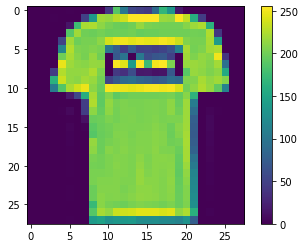

In [7]:
# now lets print out what these things look like
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## Data preprocessing
The last step before creating our model is preprocessing our data. We want to get all our values between 0 and 1 most of the time. This is because by default neural networks have weights and biases betrween 0 and 1

In [9]:
train_images = train_images / 255 # scale it down to between 1 and 0

test_images = test_images / 255 # test data must be preprocessed the exact same as the train data

shape and data is the hardest part of machine learning

In [22]:
model = keras.Sequential([ # we want a sequential neural network, where verything passes through the network from left to right
    keras.layers.Flatten(input_shape=(28, 28)), # flatten so we can take in a matrix shape and turn it into an array. Input layer
    keras.layers.Dense(128, activation='relu'), # we want a dense layer on the hidden layer. Hidden layer. we have 128 hidden neurons. usually a little bit smaller than the input layer
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # output layer, we want 10 output neurons, because we have 10 classes to sort into
    # using activation function softmax. This will make sure all our values add up to 1
])

## compilation
weve defined the architecture of our model, now we need to define the optimizer, the loss, and the metrics

In [23]:
model.compile(optimizer='adam', # hyperparameter tuning. Weights and bias arent things we can change. THese are. Hyperparameter tuning is the process of changing what we can, and observing effects
                loss='sparse_categorical_crossentropy',
                metrics=["accuracy"])

## Training the model

In [24]:
model.fit(train_images, train_labels, epochs=5) # epochs are number of times we run the data through. Another hyperparameter
#we are fitting the model

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8712 - accuracy: 0.6799
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5671 - accuracy: 0.7929
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5067 - accuracy: 0.8177
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4667 - accuracy: 0.8312
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4384 - accuracy: 0.8416


we can see accuracy and loss values

In [17]:
# now we train
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1) # verbose means we are telling it to print everything

print('test accuracy', test_acc) 

313/313 [==============================] - 1s 2ms/step - loss: 0.5117 - accuracy: 0.8178
test accuracy 0.817799985408783


Overfitting:
when the network learns the training data, and becomes less adaptable to determining what other data is. we want the highest accuracy possible with higher generalization
how do we fix that? we figure that out later
main symnptom of overfitting is significantly (several percent) lower accuracy on the test data than the training data. very high accuracy on training data is usually also a symptom
sometimes fewer epochs is better. We dont want it to completely mold to a specific set of data

## making predictions

313/313 [==============================] - 1s 2ms/step
Sweater


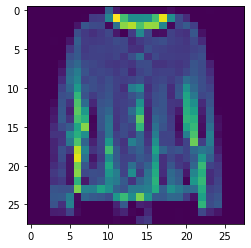

In [16]:
predictions = model.predict(test_images) # we must always give the data in an array

requested_index = int(input("Enter an index: "))
print(class_names[np.argmax(predictions[requested_index])]) #we get an array of probabilities, so we need to find the maximum value to determine what the prediction is.
# np.argmax is an index, so we can put that index into the labels array
plt.figure()
plt.imshow(test_images[requested_index])
plt.colorbar
plt.grid(False)
plt.show()

In [25]:
test_images.shape

(10000, 28, 28)

## Verification Script

1/1 [==============================] - 0s 191ms/step


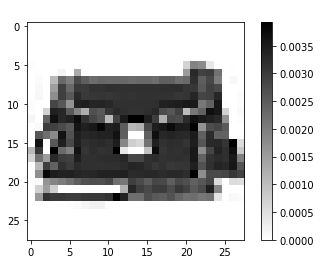

In [25]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Pants', 'Sweater', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(f"Expected: {label}")
    plt.xlabel(f"Guess: {guess}")
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number():
    while True:
        num = input("Pick a number < 10000: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 10000:
                return int(num)
        else:
            print('error please enter new number')

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)